In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My \Drive/MHA/ML Fall 2022/HW/HW2

Mounted at /content/gdrive
/content/gdrive/My Drive/MHA/ML Fall 2022/HW/HW2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data.csv')
data

,Price,Year,Mileage,City,State,Vin,Make,Model
0,40000,2017,2169,Murray,UT,3GCUKREC6HG127376,Chevrolet,Silverado
1,46991,2015,45079,Timonium,MD,1GC1KWEG9FF507573,Chevrolet,Silverado
2,38995,2017,10661,Oklahoma City,OK,3GCUKREC5HG354901,Chevrolet,Silverado
3,31860,2016,29058,Front Royal,VA,1GCVKREC3GZ189479,Chevrolet,Silverado
4,14700,2010,21824,Arlington,TX,1GCPCPEA6AZ241798,Chevrolet,Silverado
...,...,...,...,...,...,...,...,...
4294,20991,2013,66250,San Diego,CA,1GCRCSEAXDZ367632,Chevrolet,Silverado
4295,33997,2015,23000,Woods Cross,UT,3GCUKREC0FG214445,Chevrolet,Silverado
4296,29880,2014,86972,Omaha,NE,3GCUKSEC8EG291604,Chevrolet,Silverado
4297,35000,2011,141120,Cullman,AL,1GC4K1C88BF237452,Chevrolet,Silverado


# **Deleting not-necessary columns**

As descripted in telegram channel, we only need the feature 'Mileage' in this part, so we delete other categorical columns and 'Year' column too

In [ ]:
del data['Year']
del data['City']
del data['State']
del data['Vin']
del data['Make']
del data['Model']
data

,Price,Mileage
0,40000,2169
1,46991,45079
2,38995,10661
3,31860,29058
4,14700,21824
...,...,...
4294,20991,66250
4295,33997,23000
4296,29880,86972
4297,35000,141120


# **Creating exponential features from 'Mileage'**

In [ ]:
data['Mileage_2'] = data.loc[:,['Mileage']]**2
data['Mileage_3'] = data.loc[:,['Mileage']]**3
data['Mileage_4'] = data.loc[:,['Mileage']]**4
data['Mileage_5'] = data.loc[:,['Mileage']]**5
data

,Price,Mileage,Mileage_2,Mileage_3,Mileage_4,Mileage_5
0,40000,2169,4704561,10204192809,22132894202721,48006247525701849
1,46991,45079,2032116241,91605768028039,4129496416935970081,7474531253509924343
2,38995,10661,113656921,1211696434781,12917895691200241,8590477447918907989
3,31860,29058,844367364,24535626863112,712956245388308496,1388983717641812000
4,14700,21824,476286976,10394486964224,226849283507224576,7031351507509313536
...,...,...,...,...,...,...
4294,20991,66250,4389062500,290775390625000,817125555196698384,-6625824556266052960
4295,33997,23000,529000000,12167000000000,279841000000000000,-1570681724633513984
4296,29880,86972,7564128784,657867408602048,1875812039808663808,120138351834217472
4297,35000,141120,19914854400,2810384252928000,9219800225298776064,-5991956792525979648


# **Normalizing - Standardizing**

In [ ]:
data['Mileage_1_std'] = (data['Mileage'] - data['Mileage'].mean()) / data['Mileage'].std()
del data['Mileage']

In [ ]:
data['Mileage_2_std'] = (data['Mileage_2'] - data['Mileage_2'].mean()) / data['Mileage_2'].std()
del data['Mileage_2']

In [ ]:
data['Mileage_3_std'] = (data['Mileage_3'] - data['Mileage_3'].mean()) / data['Mileage_3'].std()
del data['Mileage_3']

In [ ]:
data['Mileage_4_std'] = (data['Mileage_4'] - data['Mileage_4'].mean()) / data['Mileage_4'].std()
del data['Mileage_4']

In [ ]:
data['Mileage_5_std'] = (data['Mileage_5'] - data['Mileage_5'].mean()) / data['Mileage_5'].std()
del data['Mileage_5']
data

,Price,Mileage_1_std,Mileage_2_std,Mileage_3_std,Mileage_4_std,Mileage_5_std
0,40000,-1.105817,-0.281646,-0.063156,-0.193534,0.012657
1,46991,-0.289949,-0.192430,-0.058542,0.838147,1.432008
2,38995,-0.944355,-0.276851,-0.063096,-0.190313,1.645287
3,31860,-0.594564,-0.244697,-0.061921,-0.015420,0.268943
4,14700,-0.732107,-0.260894,-0.062633,-0.136865,1.347308
...,...,...,...,...,...,...
4294,20991,0.112586,-0.088713,-0.048507,0.010605,-1.262841
4295,33997,-0.709747,-0.258574,-0.062544,-0.123626,-0.296706
4296,29880,0.506583,0.051005,-0.030013,0.275101,0.026443
4297,35000,1.536125,0.594495,0.078430,2.109875,-1.141696


# **Cost function MSE**

In [ ]:
def MSE(prediction, actual):
  # prediction = np.array(prediction, dtype=np.float64)
  # actual = np.array(prediction, dtype=np.float64)
  return np.square(np.subtract(actual, prediction)).mean()

Now our data is pre-processed and cost function is implemented for future use, we are ready for start training model, but first we need to implement our linear regression 

In [ ]:
def predict_by_poly(features, price, learning_rate, itr):
  #all things are vector-shaped here, our formula is => price = weights * features + bias
  #we start with random generated vectors for weights and bias
  bias =  np.random.rand()
  weights = np.random.rand(len(train_set.columns) - 1)       #'Price' column is not a feature 
  prediction = []
  MSE_during_trainig = []
  error = 0
  for i in range(itr):
    error = 0
    prediction = np.dot(features, weights) + bias
    error = MSE(prediction, price)
    # print(error)
    MSE_during_trainig.append(error)
    #derivations of bias and weights for gradient descent    
    derv_bias = np.sum(prediction - price)/train_set.shape[0] 
    derv_weights = (prediction - price).dot(features)/train_set.shape[0]
    #now gradient descent
    bias = bias - (learning_rate * derv_bias)  
    weights = weights - (learning_rate * derv_weights)  
  return weights, bias, prediction, MSE_during_trainig

now we find weights and bias based on train set which is selected from data, used %95 of the dataset for training.

In [ ]:
train_set = data.iloc[:4000,:]
test_set = data.iloc[4000:4300,:]
# np.array(test_set['Price'])
weights, bias, prediction, MSE_set = predict_by_poly(np.array(train_set.loc[:,'Mileage_1_std':]), np.array(train_set['Price']), 0.1, 20000)
print(MSE(prediction, np.array(train_set['Price'])))

58106563.73432558


# **Predict on test set + MSE on test**

In [ ]:
prediction = np.dot(np.array(test_set.loc[:,'Mileage_1_std':]), weights) + bias
result = pd.DataFrame()
result['Predicted_price'] = prediction
result['Actual_price'] = np.array(test_set['Price'])
print(f"MSE on test set: {MSE(np.array(result['Predicted_price']), np.array(result['Actual_price']))}")
result

MSE on test set: 59323021.477247335


,Predicted_price,Actual_price
0,23918.161785,22511
1,9779.597733,8995
2,37881.234991,47998
3,37197.991712,34997
4,35035.579282,37450
...,...,...
294,27622.777956,20991
295,35763.979464,33997
296,23965.560693,29880
297,17054.631014,35000


# **Plotting MSE on train set during training**

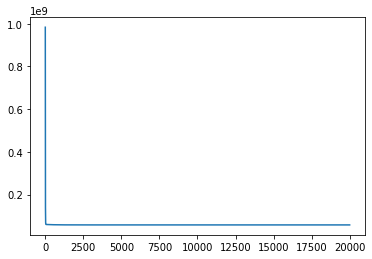

In [ ]:
plt.plot(np.arange(0, 20000, 1), MSE_set)
# MSE_set